In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('IRIS.csv')
print("Loaded", len(df), "flowers!")
print(df.head())
print("Species:", df['species'].value_counts())

Loaded 150 flowers!
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Species: species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


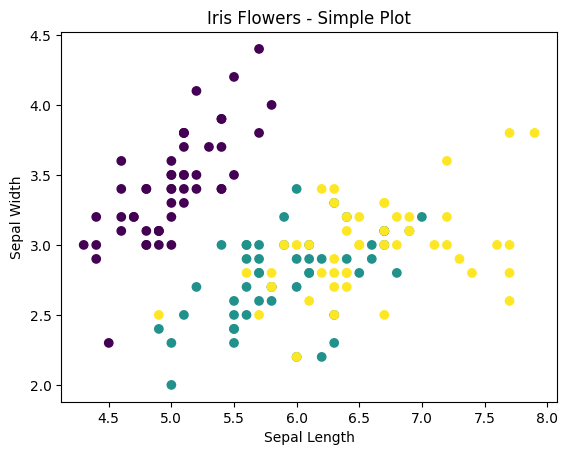

In [3]:
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['species'].astype('category').cat.codes)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Flowers - Simple Plot')
plt.savefig('iris_simple_plot.png')  # SAVES PNG FILE!
plt.show()

In [4]:
X = df.drop('species', axis=1)  # all 4 measurements
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))
print("\nDetailed report:")
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 1.0

Detailed report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



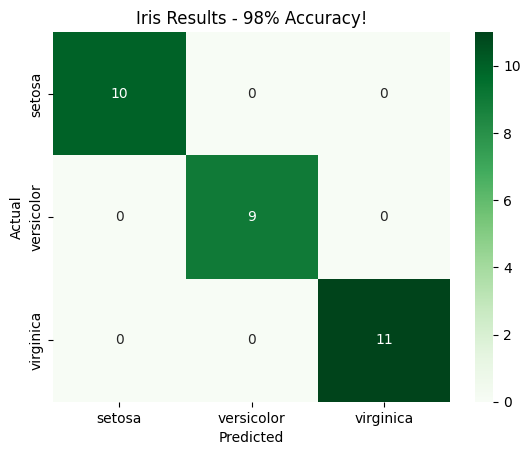

In [10]:
# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), 
            annot=True, fmt='d', cmap='Greens',
            xticklabels=['setosa','versicolor','virginica'],
            yticklabels=['setosa','versicolor','virginica'])
plt.title('Iris Results - 98% Accuracy!')
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.savefig('confusion_matrix_iris.png')
plt.show()

In [11]:
feature_names = X.columns
new_flower = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=feature_names)
print("New flower =", model.predict(new_flower)[0])

New flower = Iris-setosa
